In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

## 데이터 확인

In [3]:
df_raw = pd.read_csv("국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20230326191157.csv", encoding = "cp949")
df_raw.head(3)

,국가(대륙)별,상품군별,판매유형별,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4 p)
0,합계,합계,계,1251122,1345723,1526135,1881628,1531212,1290332,1656729,1525174,1206923,1222986,1034913,926718,567581,505954,415148,353040
1,합계,합계,면세점,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495,972384,974415,795824,681168,363520,300602,211640,152113
2,합계,합계,면세점 이외,180429,188565,189763,225993,233722,238345,245762,277679,234539,248571,239089,245550,204061,205352,203508,200927


In [4]:
print(df_raw.shape)
print(df_raw['국가(대륙)별'].value_counts())

(450, 19)
합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64


In [34]:
df_raw[df_raw['국가(대륙)별']=='미국'].head(3)

,국가(대륙)별,상품군별,판매유형별,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4 p)
45,미국,합계,계,40985,44973,55512,54054,49162,66097,67920,73390,72577,70460,69519,67036,51399,52364,48214,53332
46,미국,합계,면세점,2657,2951,1818,1481,698,339,81,67,56,1742,107,108,127,220,222,363
47,미국,합계,면세점 이외,38328,42022,53694,52573,48464,65758,67839,73323,72521,68718,69412,66928,51272,52144,47992,52969


In [6]:
df=df_raw.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'],var_name='기간',value_name='백만원')
df.head(3)

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2019.1/4,1251122
1,합계,합계,면세점,2019.1/4,1070693
2,합계,합계,면세점 이외,2019.1/4,180429


## 데이터 전처리

In [7]:
df['기간']

0          2019.1/4
1          2019.1/4
2          2019.1/4
3          2019.1/4
4          2019.1/4
           ...     
7195    2022.4/4 p)
7196    2022.4/4 p)
7197    2022.4/4 p)
7198    2022.4/4 p)
7199    2022.4/4 p)
Name: 기간, Length: 7200, dtype: object

In [8]:
df['기간'].map(lambda x: int(x.split()[0][0:4]))

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
7195    2022
7196    2022
7197    2022
7198    2022
7199    2022
Name: 기간, Length: 7200, dtype: int64

In [9]:
df['연도']= df['기간'].map(lambda x: int(x.split()[0][0:4]))
#전체 기간을 연도로 바꾸고 int type으로 바꿈 

In [10]:
df["분기"] = df['기간'].map(lambda x: int(x.split('/')[0][-1]))
#전체 기간을 분기로 바꾸고 int 타입으로 바꿈

In [11]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2019.1/4,1251122,2019,1
1,합계,합계,면세점,2019.1/4,1070693,2019,1
2,합계,합계,면세점 이외,2019.1/4,180429,2019,1
3,합계,컴퓨터 및 주변기기,계,2019.1/4,3702,2019,1
4,합계,컴퓨터 및 주변기기,면세점,2019.1/4,2,2019,1
...,...,...,...,...,...,...,...
7195,기타,생활용품 및 자동차용품,면세점,2022.4/4 p),0,2022,4
7196,기타,생활용품 및 자동차용품,면세점 이외,2022.4/4 p),61,2022,4
7197,기타,기 타,계,2022.4/4 p),215,2022,4
7198,기타,기 타,면세점,2022.4/4 p),0,2022,4


## 상품군별 시각화

In [12]:
#전체 상품군 시각화
df_total = df[df['판매유형별']=='계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2019.1/4,1251122,2019,1
3,합계,컴퓨터 및 주변기기,계,2019.1/4,3702,2019,1
6,합계,가전·전자·통신기기,계,2019.1/4,21429,2019,1
9,합계,소프트웨어,계,2019.1/4,150,2019,1
12,합계,서 적,계,2019.1/4,6357,2019,1


<AxesSubplot: xlabel='연도', ylabel='백만원'>

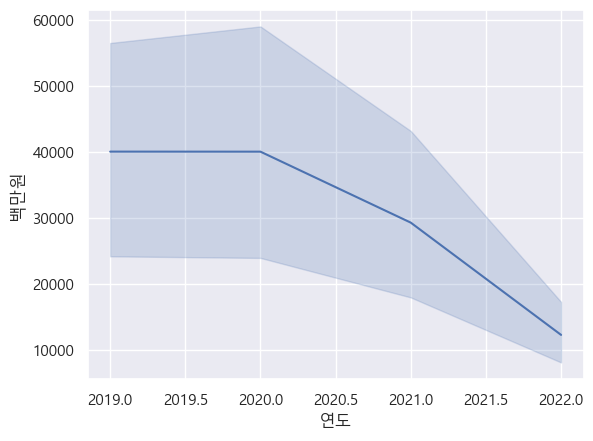

In [13]:
sns.lineplot(data=df_total,x='연도',y='백만원')
# 전체 판매액 감소

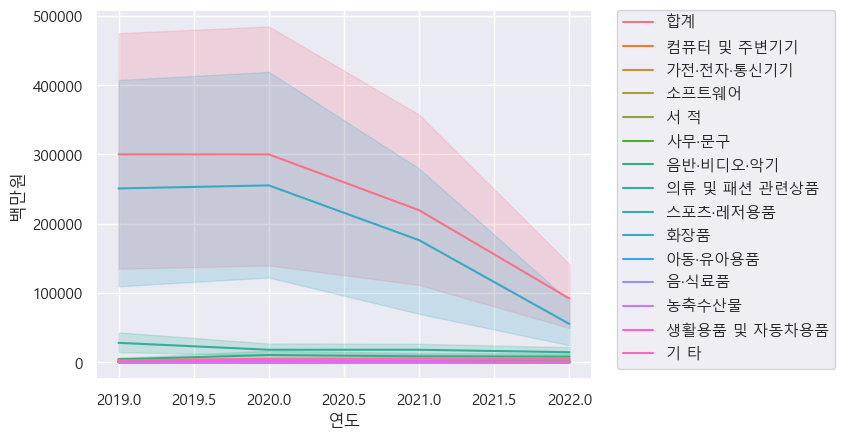

In [14]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
# 화장품 상품이 크게 하락세

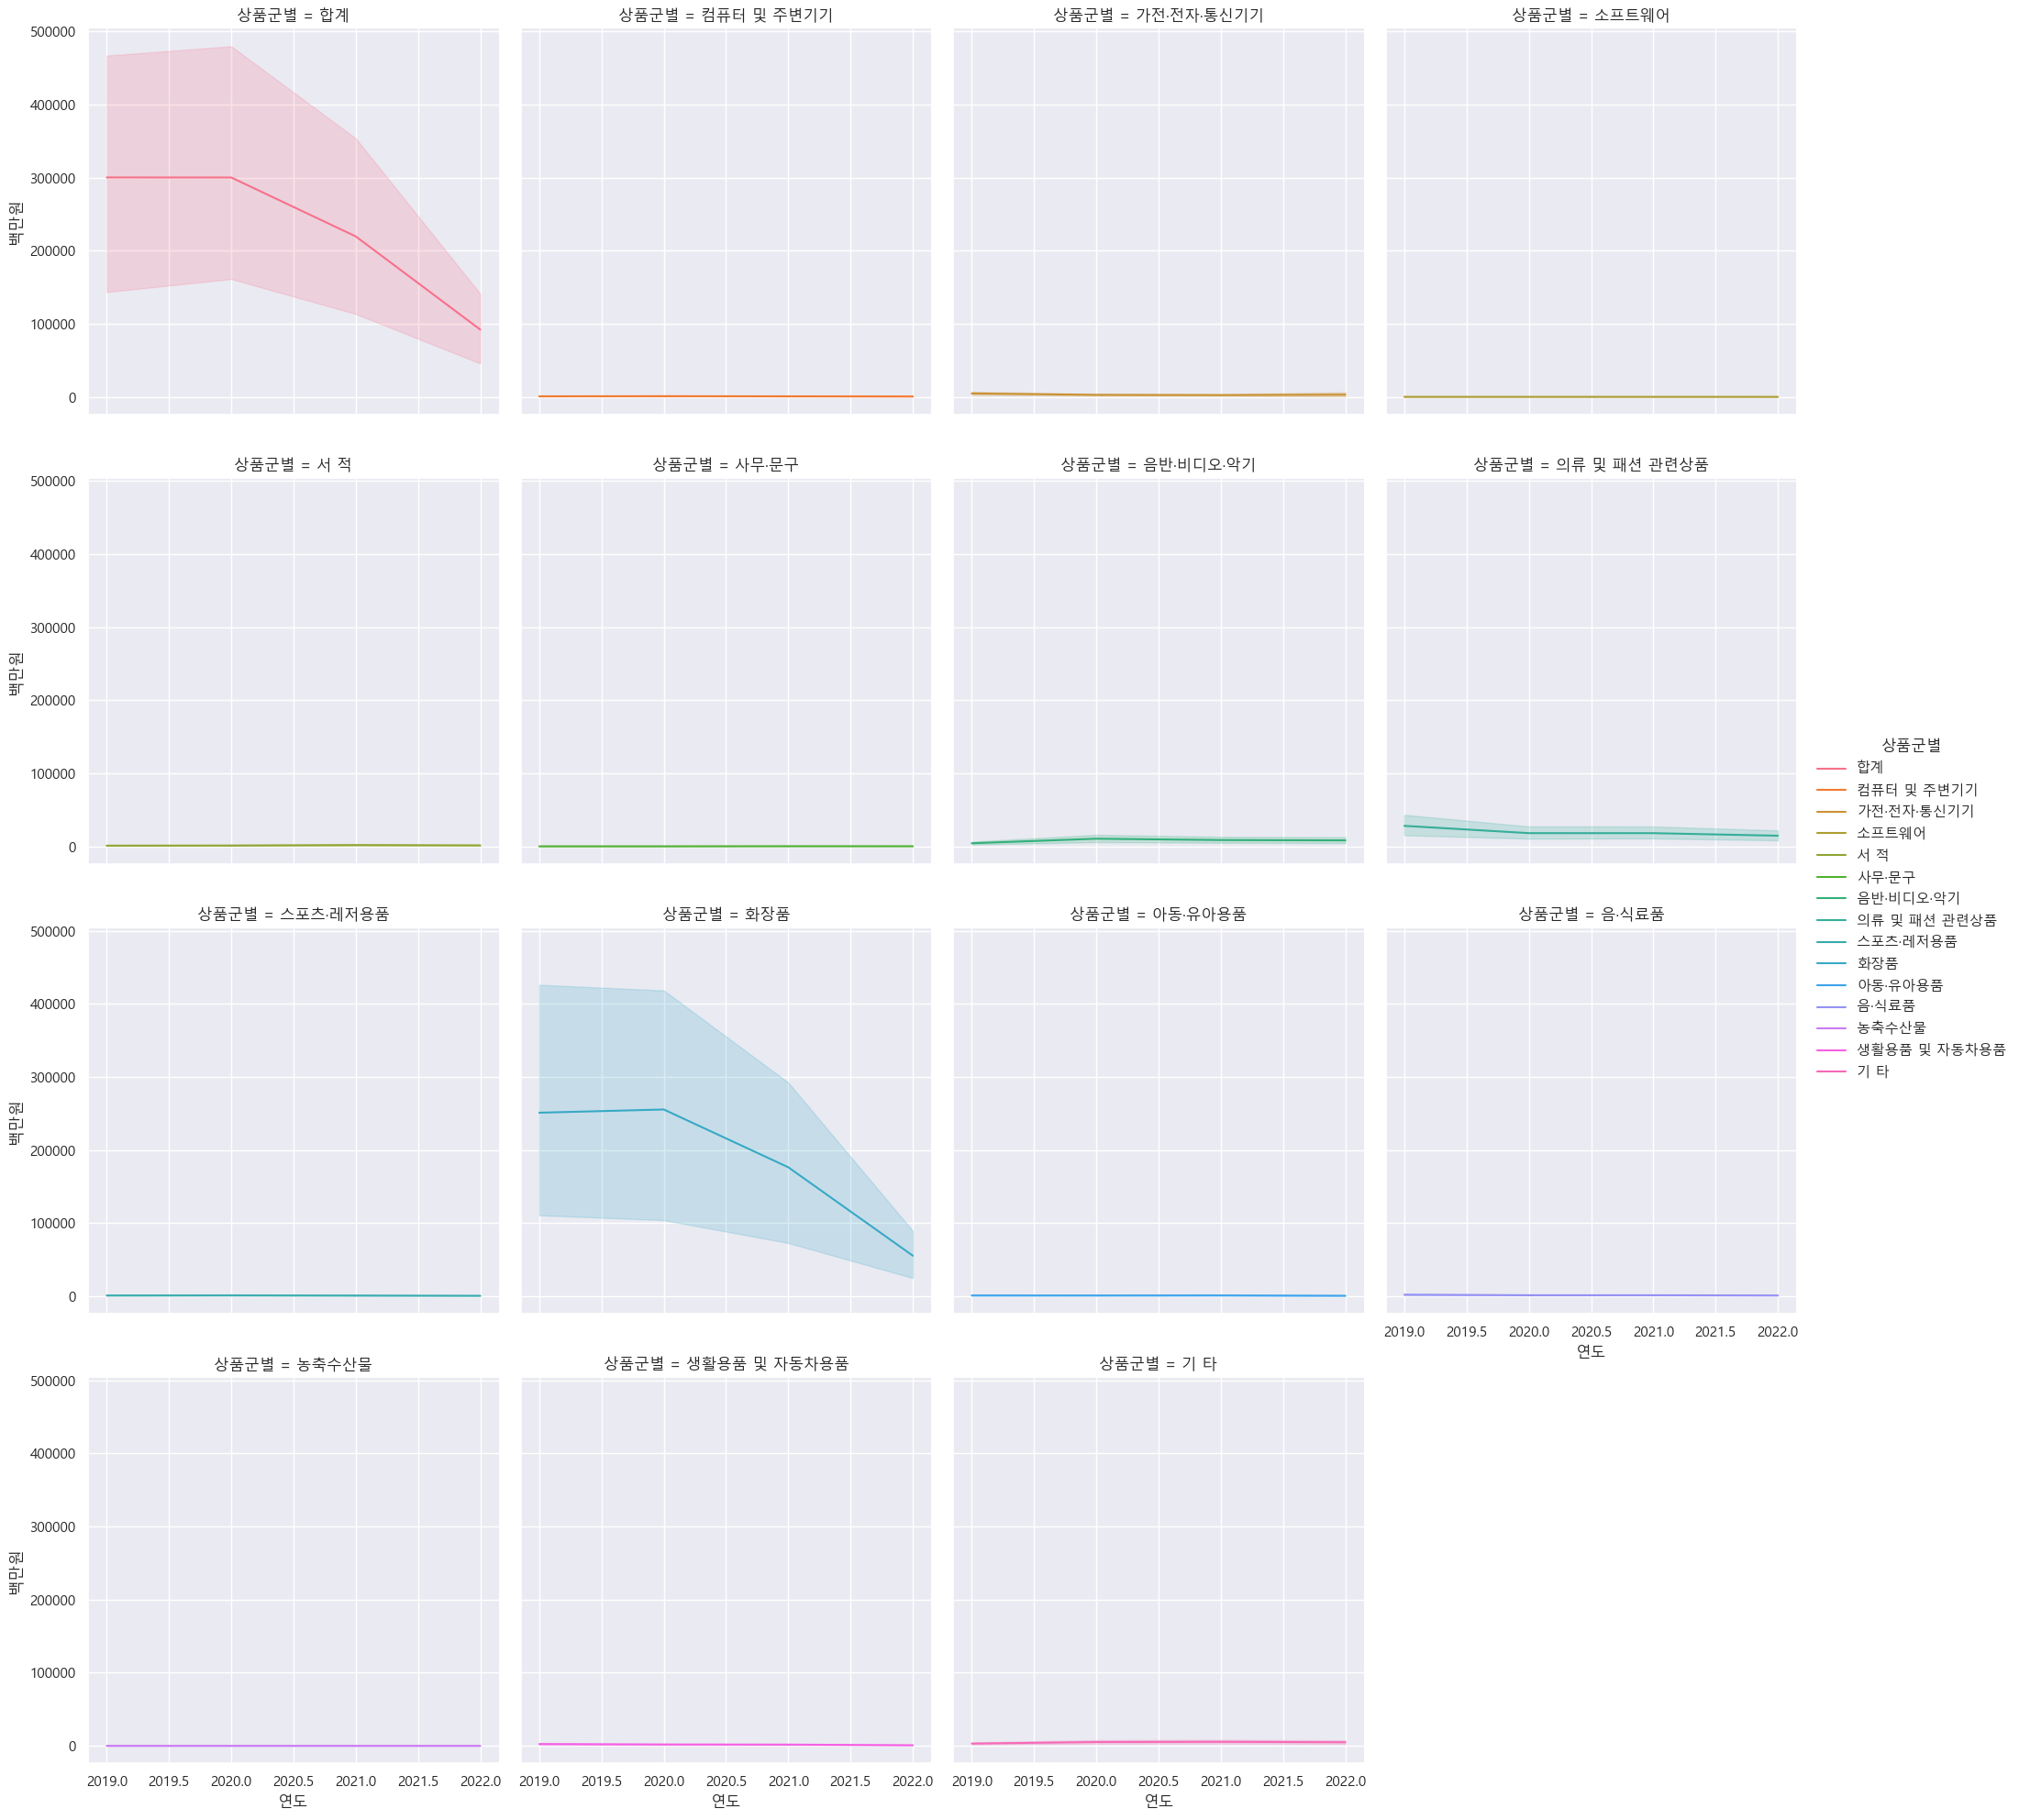

In [15]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)
# 그중에서 화장품 항목이 가장 많이 떨어짐

In [18]:
#전체 데이터 파일을 화장품과 합계를 제외
df_sub=  df_total[~df_total["상품군별"].isin(["화장품","합계"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
3,합계,컴퓨터 및 주변기기,계,2019.1/4,3702,2019,1
6,합계,가전·전자·통신기기,계,2019.1/4,21429,2019,1
9,합계,소프트웨어,계,2019.1/4,150,2019,1
12,합계,서 적,계,2019.1/4,6357,2019,1
15,합계,사무·문구,계,2019.1/4,1603,2019,1
...,...,...,...,...,...,...,...
7185,기타,아동·유아용품,계,2022.4/4 p),484,2022,4
7188,기타,음·식료품,계,2022.4/4 p),22,2022,4
7191,기타,농축수산물,계,2022.4/4 p),0,2022,4
7194,기타,생활용품 및 자동차용품,계,2022.4/4 p),61,2022,4


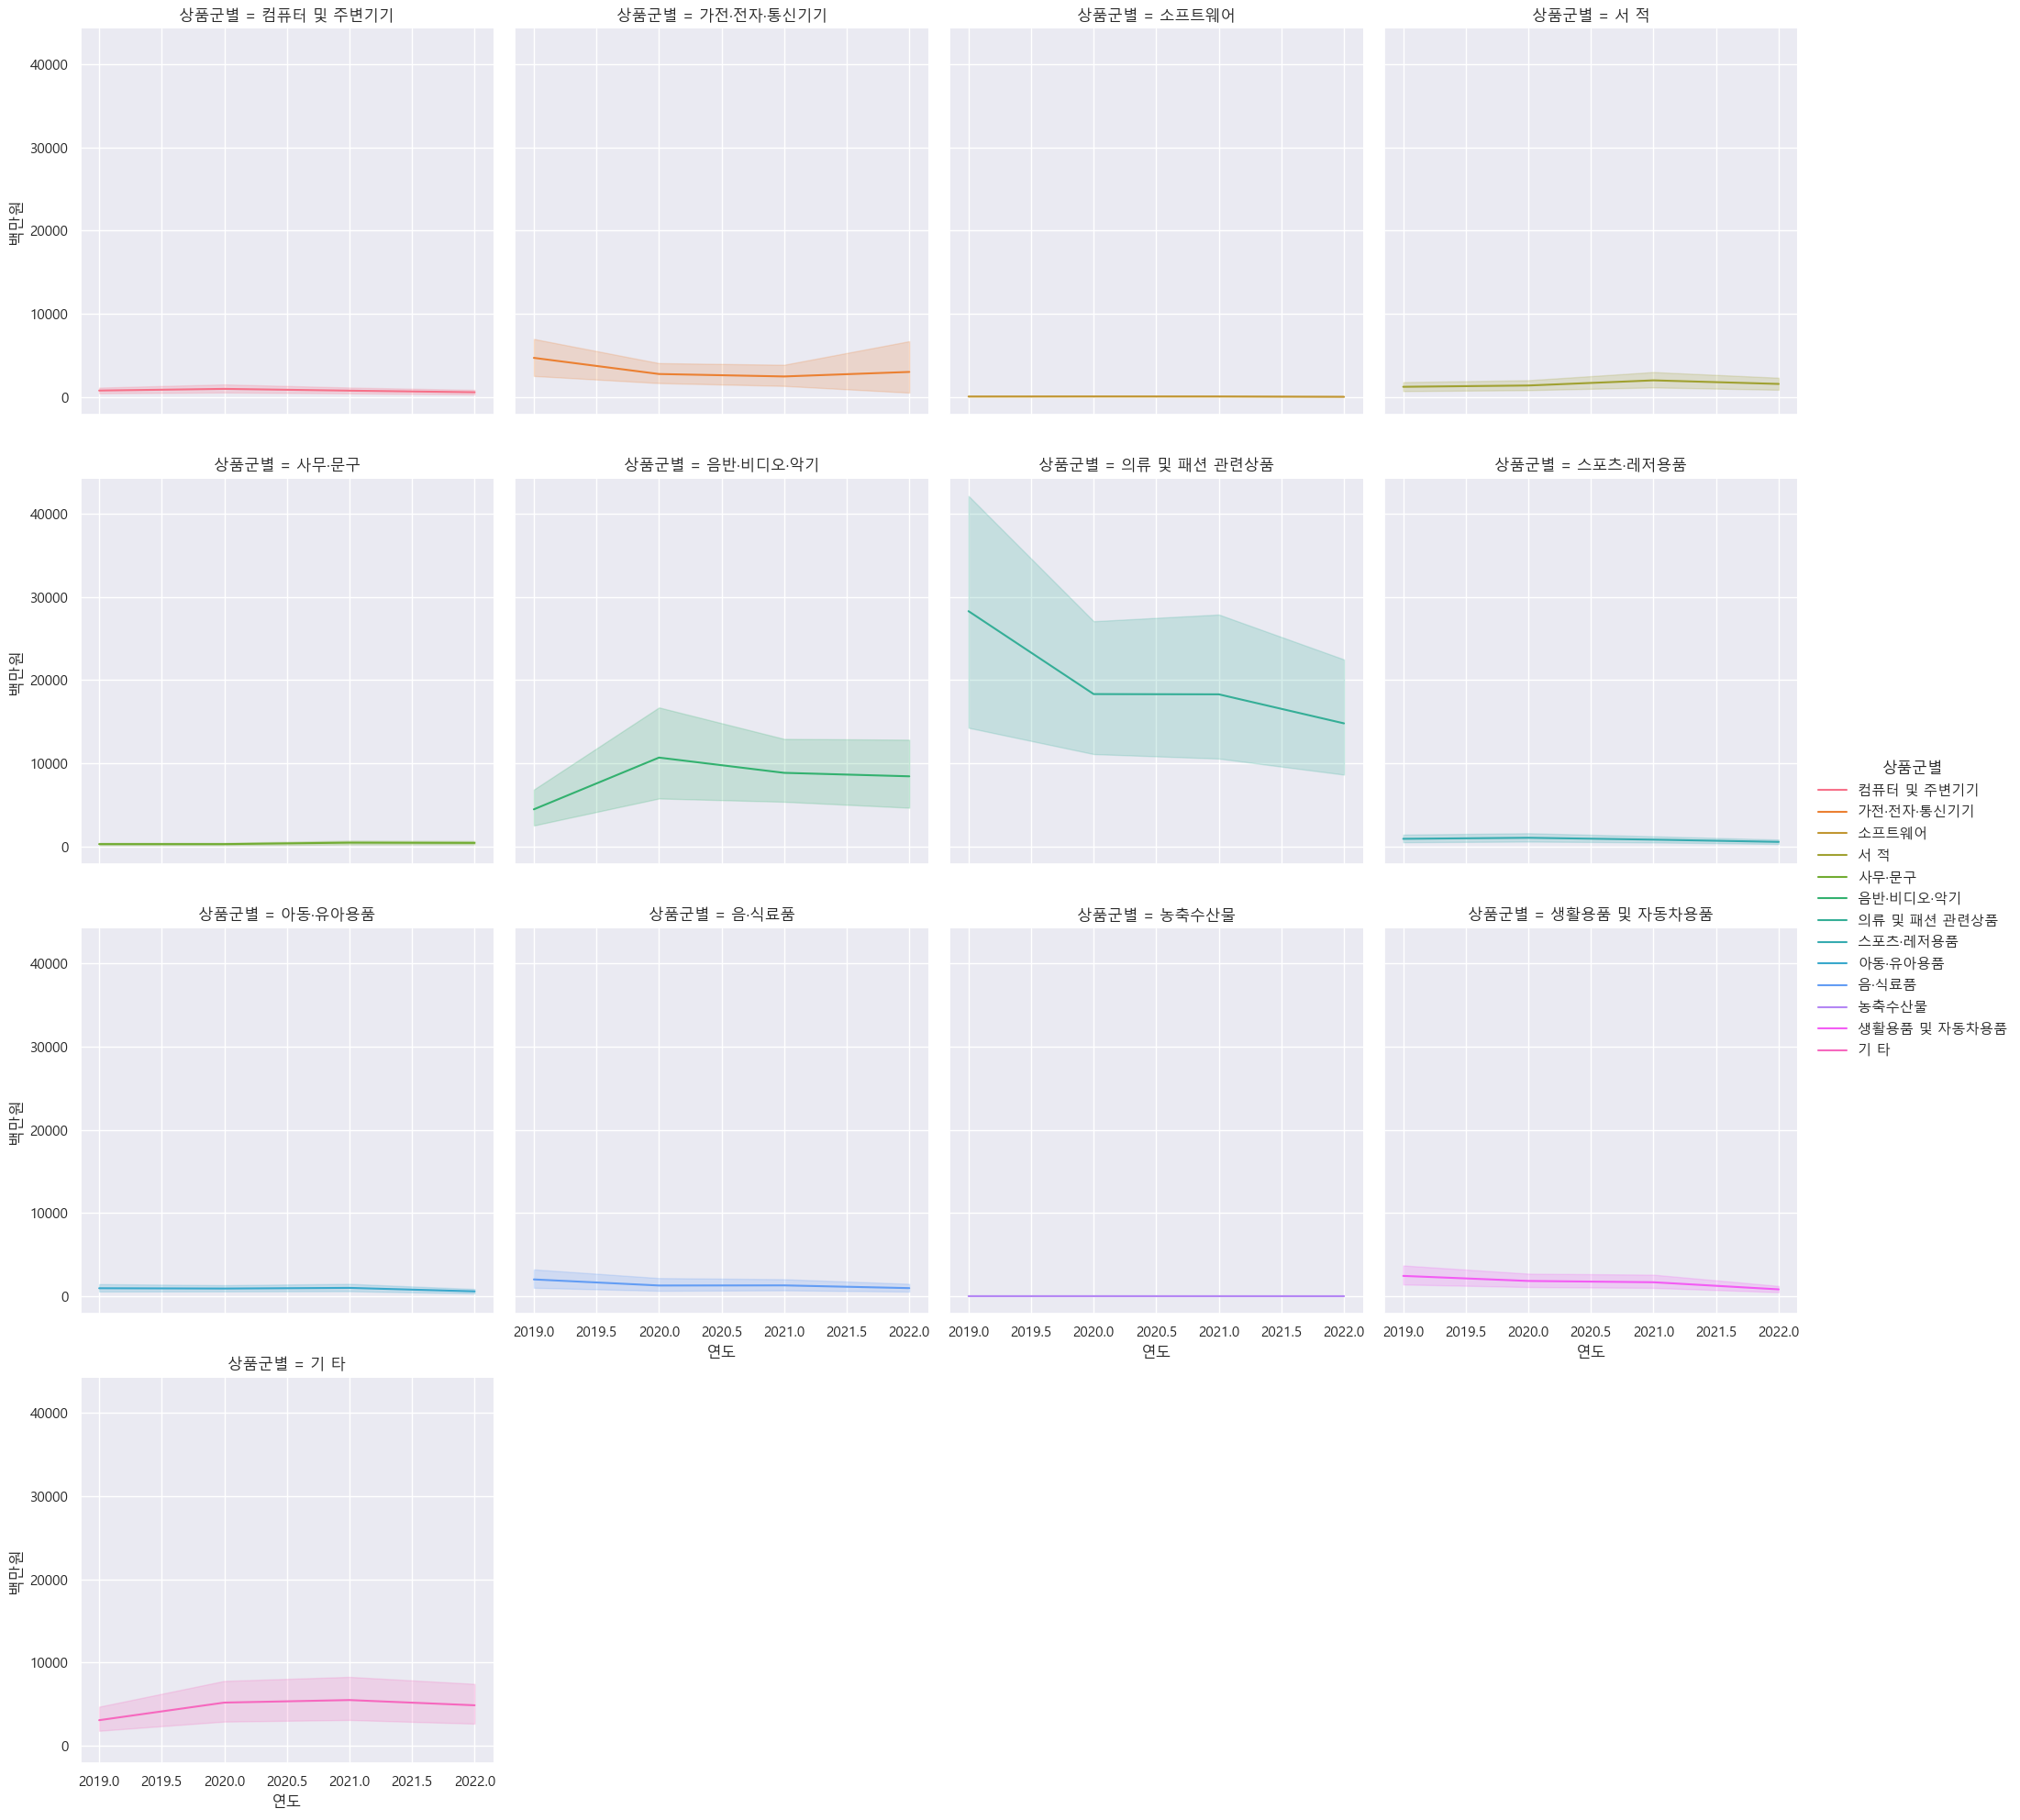

In [19]:
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)
#화장품이 큰 비중을 차지하기 때문에 제외